In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [2]:
sky = pd.read_csv("Sky Server.csv")

In [3]:
sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267.0,3.722360e+18,STAR,-0.000009,3306.0,54922.0,491.0
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267.0,3.638140e+17,STAR,-0.000055,323.0,51615.0,541.0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268.0,3.232740e+17,GALAXY,0.123111,287.0,52023.0,513.0
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269.0,3.722370e+18,STAR,-0.000111,3306.0,54922.0,510.0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269.0,3.722370e+18,STAR,0.000590,3306.0,54922.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,1.237650e+18,130.841677,0.999005,18.95358,17.54726,16.75322,16.35117,16.08986,1239.0,301.0,6.0,70.0,5.259020e+17,GALAXY,0.110381,467.0,51901.0,387.0
8414,1.237650e+18,130.852163,0.951573,18.59335,16.53429,15.48791,14.98926,14.61014,1239.0,301.0,6.0,70.0,5.259020e+17,GALAXY,0.096327,467.0,51901.0,389.0
8415,1.237650e+18,131.078028,0.886101,18.64174,18.91801,19.41393,19.77970,20.10166,1239.0,301.0,6.0,72.0,4.289760e+18,STAR,0.000220,3810.0,56015.0,286.0
8416,1.237650e+18,131.145721,0.921603,18.01667,17.71583,17.63513,17.56084,17.53474,1239.0,301.0,6.0,72.0,5.259140e+17,QSO,0.439289,467.0,51901.0,433.0


In [4]:
sky.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run          float64
rerun        float64
camcol       float64
field        float64
specobjid    float64
class         object
redshift     float64
plate        float64
mjd          float64
fiberid      float64
dtype: object

In [5]:
sky.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            1
r            1
i            1
z            1
run          1
rerun        1
camcol       1
field        1
specobjid    1
class        1
redshift     1
plate        1
mjd          1
fiberid      1
dtype: int64

In [6]:
sky.dropna(inplace=True)

In [7]:
sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267.0,3.722360e+18,STAR,-0.000009,3306.0,54922.0,491.0
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267.0,3.638140e+17,STAR,-0.000055,323.0,51615.0,541.0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268.0,3.232740e+17,GALAXY,0.123111,287.0,52023.0,513.0
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269.0,3.722370e+18,STAR,-0.000111,3306.0,54922.0,510.0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269.0,3.722370e+18,STAR,0.000590,3306.0,54922.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8412,1.237650e+18,130.778930,0.962776,19.15103,17.32718,16.49546,16.10516,15.84143,1239.0,301.0,6.0,70.0,5.259040e+17,GALAXY,0.076989,467.0,51901.0,396.0
8413,1.237650e+18,130.841677,0.999005,18.95358,17.54726,16.75322,16.35117,16.08986,1239.0,301.0,6.0,70.0,5.259020e+17,GALAXY,0.110381,467.0,51901.0,387.0
8414,1.237650e+18,130.852163,0.951573,18.59335,16.53429,15.48791,14.98926,14.61014,1239.0,301.0,6.0,70.0,5.259020e+17,GALAXY,0.096327,467.0,51901.0,389.0
8415,1.237650e+18,131.078028,0.886101,18.64174,18.91801,19.41393,19.77970,20.10166,1239.0,301.0,6.0,72.0,4.289760e+18,STAR,0.000220,3810.0,56015.0,286.0


In [8]:
sky.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sky['class'] = le.fit_transform(sky['class'].astype(str))

In [11]:
sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267.0,3.722360e+18,2,-0.000009,3306.0,54922.0,491.0
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267.0,3.638140e+17,2,-0.000055,323.0,51615.0,541.0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268.0,3.232740e+17,0,0.123111,287.0,52023.0,513.0
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269.0,3.722370e+18,2,-0.000111,3306.0,54922.0,510.0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269.0,3.722370e+18,2,0.000590,3306.0,54922.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8412,1.237650e+18,130.778930,0.962776,19.15103,17.32718,16.49546,16.10516,15.84143,1239.0,301.0,6.0,70.0,5.259040e+17,0,0.076989,467.0,51901.0,396.0
8413,1.237650e+18,130.841677,0.999005,18.95358,17.54726,16.75322,16.35117,16.08986,1239.0,301.0,6.0,70.0,5.259020e+17,0,0.110381,467.0,51901.0,387.0
8414,1.237650e+18,130.852163,0.951573,18.59335,16.53429,15.48791,14.98926,14.61014,1239.0,301.0,6.0,70.0,5.259020e+17,0,0.096327,467.0,51901.0,389.0
8415,1.237650e+18,131.078028,0.886101,18.64174,18.91801,19.41393,19.77970,20.10166,1239.0,301.0,6.0,72.0,4.289760e+18,2,0.000220,3810.0,56015.0,286.0


In [12]:
sky.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run          float64
rerun        float64
camcol       float64
field        float64
specobjid    float64
class          int32
redshift     float64
plate        float64
mjd          float64
fiberid      float64
dtype: object

In [13]:
sky.skew()

objid        1.000178
ra          -1.196442
dec          1.488789
u           -1.218973
g           -0.541467
r           -0.014741
i            0.303195
z            0.196327
run          0.539451
rerun        0.000000
camcol      -0.107280
field        0.261513
specobjid    1.797436
class        0.171462
redshift     4.370244
plate        1.797420
mjd          1.049550
fiberid      0.333279
dtype: float64

objid           AxesSubplot(0.125,0.816017;0.133621x0.0639831)
ra           AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
dec           AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
u            AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
g            AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
r               AxesSubplot(0.125,0.739237;0.133621x0.0639831)
i            AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
z             AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
run          AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
rerun        AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
camcol          AxesSubplot(0.125,0.662458;0.133621x0.0639831)
field        AxesSubplot(0.285345,0.662458;0.133621x0.0639831)
specobjid     AxesSubplot(0.44569,0.662458;0.133621x0.0639831)
class        AxesSubplot(0.606034,0.662458;0.133621x0.0639831)
redshift     AxesSubplot(0.766379,0.662458;0.133621x0.0639831)
plate           AxesSubplot(0.125,0.585678;0.133621x0.0

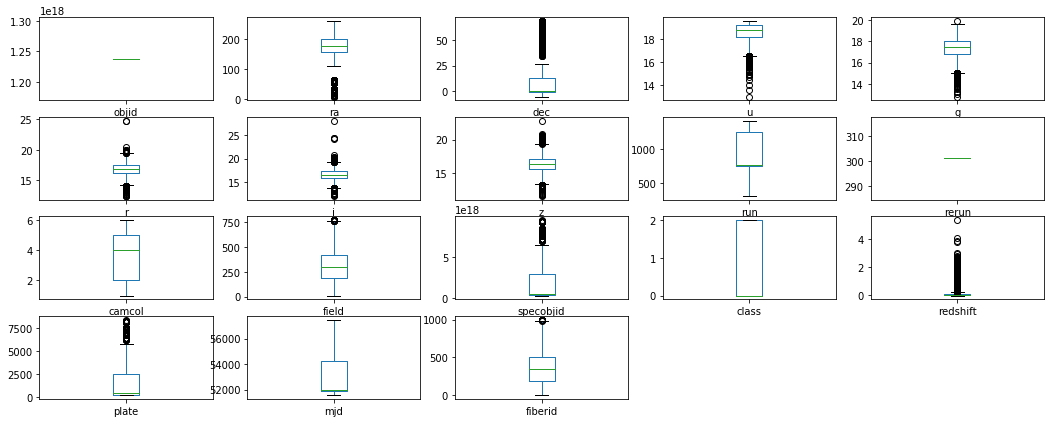

In [14]:
sky.plot(kind="box",subplots = True,layout=(10,5),figsize=(18,18))

In [15]:
sky['objid'].value_counts() # we can drop this column as all the values are same

1.237650e+18    8417
Name: objid, dtype: int64

In [16]:
sky.drop('objid',axis=1,inplace= True)

In [17]:
sky['specobjid'].value_counts()

2.881220e+18    18
2.881270e+18    18
3.222410e+18    17
3.222370e+18    16
2.881250e+18    16
                ..
4.315780e+18     1
4.988460e+17     1
4.841730e+17     1
3.885350e+17     1
3.716180e+17     1
Name: specobjid, Length: 5404, dtype: int64

In [18]:
sky

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752.0,301.0,4.0,267.0,3.722360e+18,2,-0.000009,3306.0,54922.0,491.0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752.0,301.0,4.0,267.0,3.638140e+17,2,-0.000055,323.0,51615.0,541.0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752.0,301.0,4.0,268.0,3.232740e+17,0,0.123111,287.0,52023.0,513.0
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752.0,301.0,4.0,269.0,3.722370e+18,2,-0.000111,3306.0,54922.0,510.0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752.0,301.0,4.0,269.0,3.722370e+18,2,0.000590,3306.0,54922.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8412,130.778930,0.962776,19.15103,17.32718,16.49546,16.10516,15.84143,1239.0,301.0,6.0,70.0,5.259040e+17,0,0.076989,467.0,51901.0,396.0
8413,130.841677,0.999005,18.95358,17.54726,16.75322,16.35117,16.08986,1239.0,301.0,6.0,70.0,5.259020e+17,0,0.110381,467.0,51901.0,387.0
8414,130.852163,0.951573,18.59335,16.53429,15.48791,14.98926,14.61014,1239.0,301.0,6.0,70.0,5.259020e+17,0,0.096327,467.0,51901.0,389.0
8415,131.078028,0.886101,18.64174,18.91801,19.41393,19.77970,20.10166,1239.0,301.0,6.0,72.0,4.289760e+18,2,0.000220,3810.0,56015.0,286.0


In [19]:
sky['run'].unique()

array([ 752.,  756.,  308.,  727.,  745., 1035., 1045., 1140., 1231.,
       1332., 1334., 1302., 1239., 1119., 1331., 1345., 1350., 1404.,
       1412., 1336., 1402.])

In [20]:
sky['rerun'].unique()

array([301.])

In [21]:
sky.drop('rerun',axis=1,inplace= True) # since rerun has same values in all fields

In [22]:
sky['camcol'].unique()

array([4., 2., 1., 5., 6., 3.])

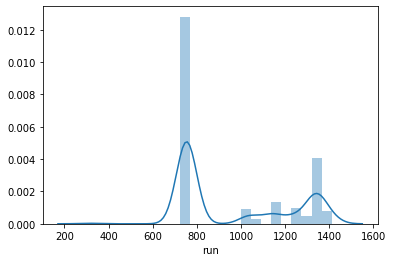

In [23]:
sns.distplot(sky['run']) # data should be normalisd

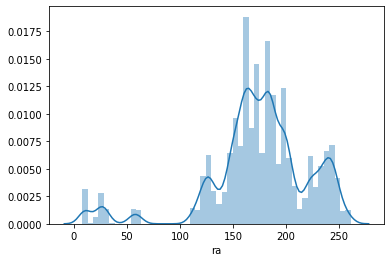

In [24]:
sns.distplot(sky['ra']) # skeewed data

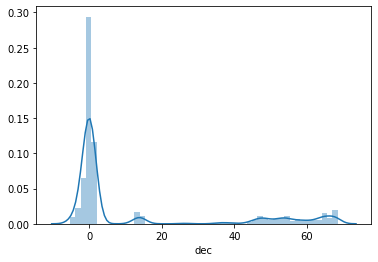

In [25]:
sns.distplot(sky['dec']) # skewed data 

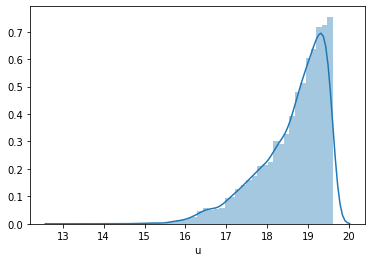

In [26]:
sns.distplot(sky['u']) # skewed data

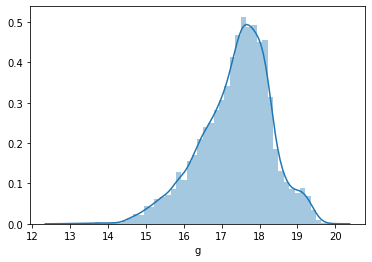

In [27]:
sns.distplot(sky['g']) # skewed data 

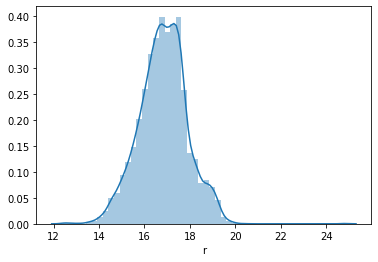

In [28]:
sns.distplot(sky['r']) # pretty much normal

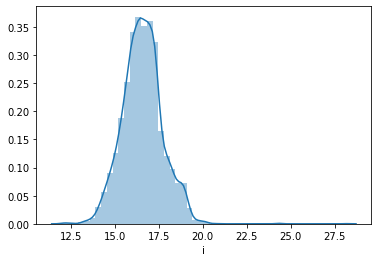

In [29]:
sns.distplot(sky['i']) # prettty much normal

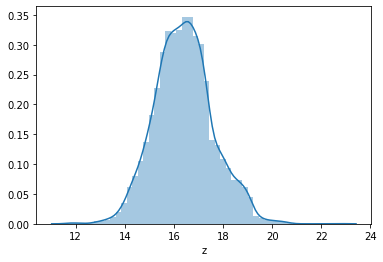

In [30]:
sns.distplot(sky['z']) # pretty much normal

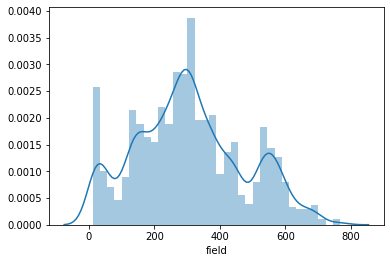

In [31]:
sns.distplot(sky['field']) # should be treated

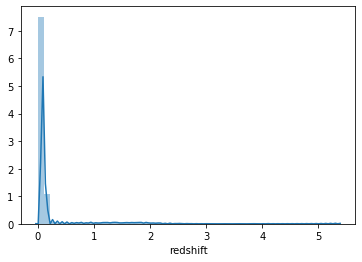

In [32]:
sns.distplot(sky['redshift']) # skewed should be treated

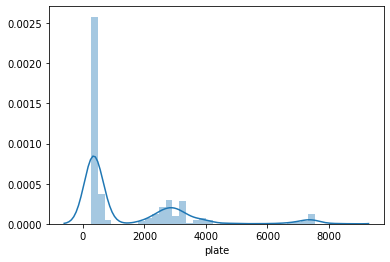

In [33]:
sns.distplot(sky['plate']) # should be treated

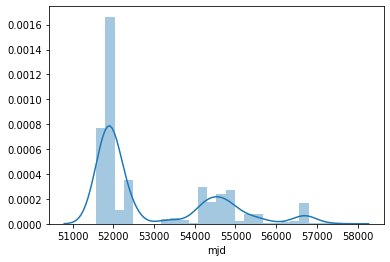

In [34]:
sns.distplot(sky['mjd']) # should be treated

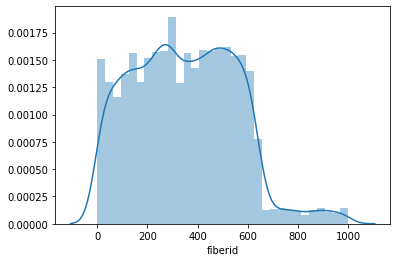

In [35]:
sns.distplot(sky['fiberid']) # should be treated

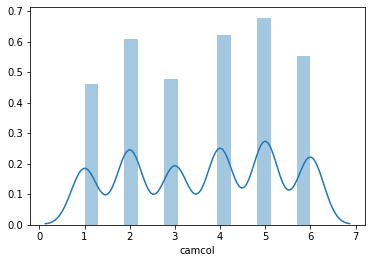

In [36]:
sns.distplot(sky['camcol'])

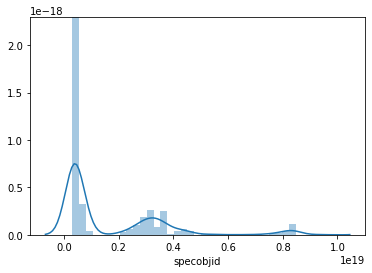

In [37]:
sns.distplot(sky['specobjid']) # should be treated

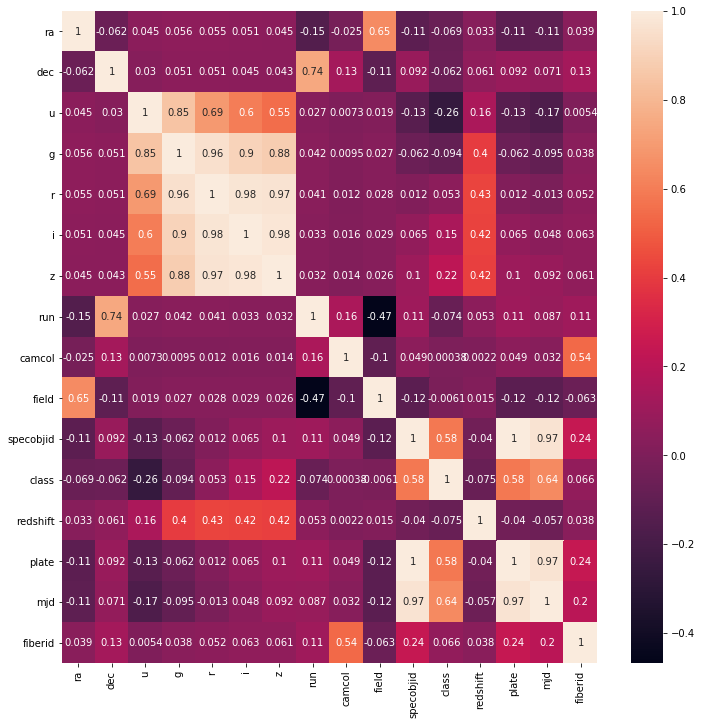

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(sky.corr(),annot= True)
plt.show()

In [39]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(sky,0.95)
len(set(corr_features))

5

In [41]:
# here above function shows heavy correlation of more than 95% between the variables in the dataset , it could result in overfitting . Wise thing is to drop them


In [42]:
corr_features

{'i', 'mjd', 'plate', 'r', 'z'}

In [43]:
sky_new = sky.drop(corr_features,axis=1)

In [44]:
sky_new

,ra,dec,u,g,run,camcol,field,specobjid,class,redshift,fiberid
0,183.531326,0.089693,19.47406,17.04240,752.0,4.0,267.0,3.722360e+18,2,-0.000009,491.0
1,183.598371,0.135285,18.66280,17.21449,752.0,4.0,267.0,3.638140e+17,2,-0.000055,541.0
2,183.680207,0.126185,19.38298,18.19169,752.0,4.0,268.0,3.232740e+17,0,0.123111,513.0
3,183.870529,0.049911,17.76536,16.60272,752.0,4.0,269.0,3.722370e+18,2,-0.000111,510.0
4,183.883288,0.102557,17.55025,16.26342,752.0,4.0,269.0,3.722370e+18,2,0.000590,512.0
...,...,...,...,...,...,...,...,...,...,...,...
8412,130.778930,0.962776,19.15103,17.32718,1239.0,6.0,70.0,5.259040e+17,0,0.076989,396.0
8413,130.841677,0.999005,18.95358,17.54726,1239.0,6.0,70.0,5.259020e+17,0,0.110381,387.0
8414,130.852163,0.951573,18.59335,16.53429,1239.0,6.0,70.0,5.259020e+17,0,0.096327,389.0
8415,131.078028,0.886101,18.64174,18.91801,1239.0,6.0,72.0,4.289760e+18,2,0.000220,286.0


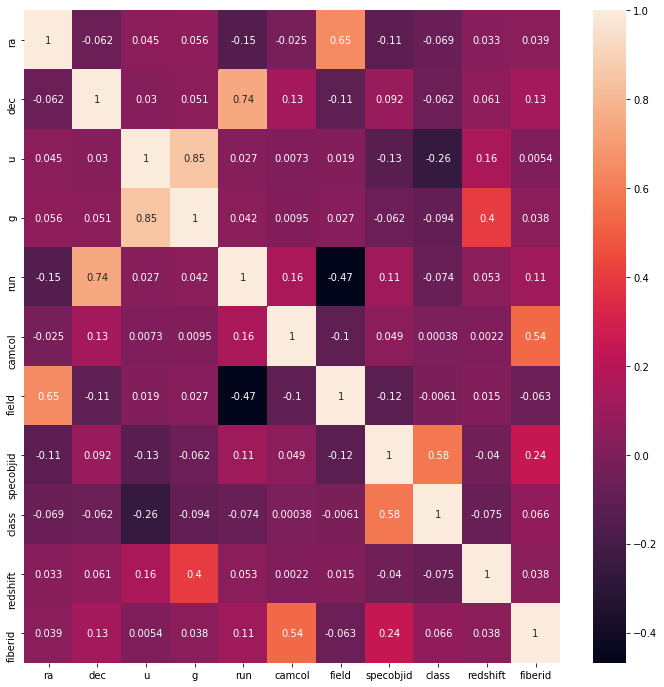

In [45]:
plt.figure(figsize=(12,12))
sns.heatmap(sky_new.corr(),annot= True)
plt.show()

In [46]:
#now the correlation looks good again time to cross check

In [47]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(sky_new,0.95) # we are good to go
len(set(corr_features))

0

In [49]:
from scipy.stats import zscore
z = np.abs(zscore(sky_new))
z
print(sky_new.shape)
space =sky_new.loc[(z<3).all(axis=1)]
print(space.shape)

(8417, 11)
(7342, 11)


In [50]:
space.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7342 entries, 0 to 8416
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         7342 non-null   float64
 1   dec        7342 non-null   float64
 2   u          7342 non-null   float64
 3   g          7342 non-null   float64
 4   run        7342 non-null   float64
 5   camcol     7342 non-null   float64
 6   field      7342 non-null   float64
 7   specobjid  7342 non-null   float64
 8   class      7342 non-null   int32  
 9   redshift   7342 non-null   float64
 10  fiberid    7342 non-null   float64
dtypes: float64(10), int32(1)
memory usage: 659.6 KB


In [51]:
space.describe()

,ra,dec,u,g,run,camcol,field,specobjid,class,redshift,fiberid
count,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7.342000e+03,7342.000000,7342.000000,7342.000000
mean,181.330671,11.585933,18.638408,17.337803,946.550667,3.631708,322.008581,1.303621e+18,0.849087,0.076046,341.642604
std,37.313557,23.380168,0.776274,0.866110,264.275271,1.689658,162.453244,1.442811e+18,0.965047,0.165760,189.707966
min,29.797528,-5.382632,16.153330,14.570770,308.000000,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,1.000000
25%,160.677428,-0.654515,18.191612,16.812893,752.000000,2.000000,217.000000,3.333215e+17,0.000000,0.000117,190.000000
50%,179.677680,0.255783,18.847230,17.470805,756.000000,4.000000,305.000000,4.088130e+17,0.000000,0.044496,345.000000
75%,201.483979,1.152577,19.254330,17.949932,1239.000000,5.000000,430.000000,2.880090e+18,2.000000,0.087352,495.000000
max,260.760200,68.542265,19.599900,19.918970,1412.000000,6.000000,767.000000,7.685630e+18,2.000000,1.301266,962.000000


In [52]:
space.isnull().sum() # no null values time to for modelling

ra           0
dec          0
u            0
g            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
fiberid      0
dtype: int64

In [53]:
space.dtypes

ra           float64
dec          float64
u            float64
g            float64
run          float64
camcol       float64
field        float64
specobjid    float64
class          int32
redshift     float64
fiberid      float64
dtype: object

In [54]:
space.skew()

ra          -0.283844
dec          1.527467
u           -0.984896
g           -0.498562
run          0.671687
camcol      -0.145953
field        0.236916
specobjid    1.271255
class        0.305109
redshift     5.038548
fiberid      0.084504
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024990D22F88>,
      dtype=object)

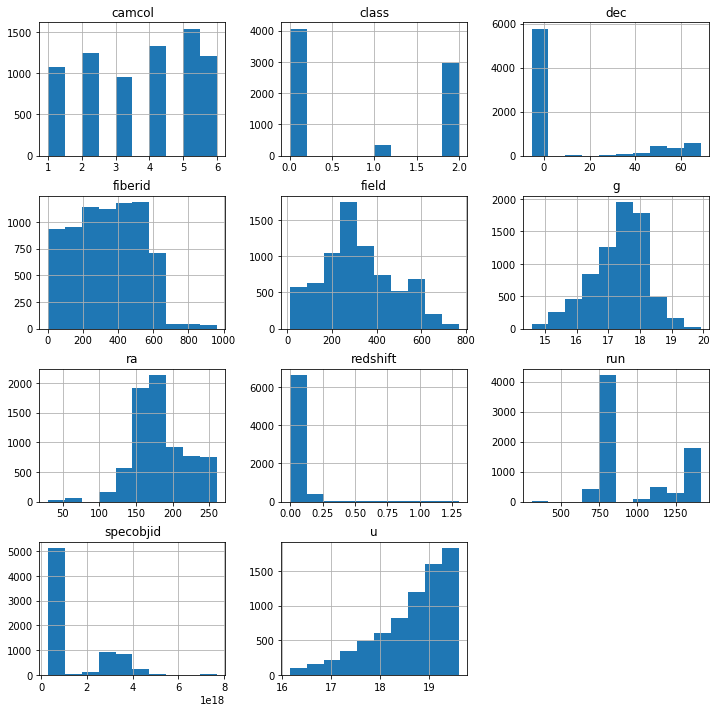

In [55]:
space.hist(figsize=(12,12))

In [56]:
x= space.drop(["class"],axis=1)
y = space["class"]
df_x= space.drop(["class"],axis=1)

In [57]:
x.shape

(7342, 10)

In [58]:
y.shape

(7342,)

In [59]:
x.skew()

ra          -0.283844
dec          1.527467
u           -0.984896
g           -0.498562
run          0.671687
camcol      -0.145953
field        0.236916
specobjid    1.271255
redshift     5.038548
fiberid      0.084504
dtype: float64

In [60]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = pt.fit_transform(x)  
x = pd.DataFrame(x,columns=df_x.columns)
x

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,ra,dec,u,g,run,camcol,field,specobjid,redshift,fiberid
0,0.022581,-0.139471,1.341652,-0.427595,-0.709866,0.228982,-0.267004,0.0,-1.040432,0.796705
1,0.024415,-0.127097,-0.208162,-0.232146,-0.709866,0.228982,-0.267004,0.0,-1.041832,1.022033
2,0.026653,-0.129533,1.127485,1.014638,-0.709866,0.228982,-0.260770,0.0,1.183818,0.896545
3,0.031861,-0.150628,-1.219889,-0.896639,-0.709866,0.228982,-0.254542,0.0,-1.043531,0.882996
4,0.032210,-0.135936,-1.387415,-1.230201,-0.709866,0.228982,-0.254542,0.0,-1.022225,0.892031
...,...,...,...,...,...,...,...,...,...,...
7337,-1.343215,0.046318,0.632083,-0.100411,1.162299,1.387723,-1.664679,0.0,0.623597,0.351321
7338,-1.341688,0.052381,0.261800,0.165636,1.162299,1.387723,-1.664679,0.0,1.051202,0.307776
7339,-1.341433,0.044424,-0.308460,-0.965851,1.162299,1.387723,-1.664679,0.0,0.886550,0.317475
7340,-1.335937,0.033170,-0.239034,2.106395,1.162299,1.387723,-1.647583,0.0,-1.033472,-0.200953


In [61]:
x.skew() # good skewness removed very much

ra           0.057425
dec         -0.633429
u           -0.209519
g           -0.013367
run         -0.056642
camcol      -0.173664
field       -0.112758
specobjid    0.000000
redshift     0.437934
fiberid     -0.244095
dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [63]:
x

,ra,dec,u,g,run,camcol,field,specobjid,redshift,fiberid
0,0.022581,-0.139471,1.341652,-0.427595,-0.709866,0.228982,-0.267004,0.0,-1.040432,0.796705
1,0.024415,-0.127097,-0.208162,-0.232146,-0.709866,0.228982,-0.267004,0.0,-1.041832,1.022033
2,0.026653,-0.129533,1.127485,1.014638,-0.709866,0.228982,-0.260770,0.0,1.183818,0.896545
3,0.031861,-0.150628,-1.219889,-0.896639,-0.709866,0.228982,-0.254542,0.0,-1.043531,0.882996
4,0.032210,-0.135936,-1.387415,-1.230201,-0.709866,0.228982,-0.254542,0.0,-1.022225,0.892031
...,...,...,...,...,...,...,...,...,...,...
7337,-1.343215,0.046318,0.632083,-0.100411,1.162299,1.387723,-1.664679,0.0,0.623597,0.351321
7338,-1.341688,0.052381,0.261800,0.165636,1.162299,1.387723,-1.664679,0.0,1.051202,0.307776
7339,-1.341433,0.044424,-0.308460,-0.965851,1.162299,1.387723,-1.664679,0.0,0.886550,0.317475
7340,-1.335937,0.033170,-0.239034,2.106395,1.162299,1.387723,-1.647583,0.0,-1.033472,-0.200953


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [65]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [66]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 3}

In [67]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 16}

In [68]:
knn =KNeighborsClassifier(n_neighbors=3 )
svc = SVC()
dt= DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators= 14)
mb = MultinomialNB()

In [69]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("RandomForestClassifier",rf))
models.append(("DecisionTreeClassifier",dt))
models.append(("KNeighborsClassifier",knn))
models.append(("MultinomailNB",mb))

In [70]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9843169624432522
[[1272    4   19]
 [  15  102    0]
 [   0    0 1011]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1295
           1       0.96      0.87      0.91       117
           2       0.98      1.00      0.99      1011

    accuracy                           0.98      2423
   macro avg       0.98      0.95      0.96      2423
weighted avg       0.98      0.98      0.98      2423



In [71]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predk = knn.predict(x_test)
print(accuracy_score(y_test,predk))
print(confusion_matrix(y_test,predk))
print(classification_report(y_test,predk))


0.9640940982253405
[[1244    4   47]
 [  22   95    0]
 [  14    0  997]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1295
           1       0.96      0.81      0.88       117
           2       0.95      0.99      0.97      1011

    accuracy                           0.96      2423
   macro avg       0.96      0.92      0.94      2423
weighted avg       0.96      0.96      0.96      2423



In [72]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9814279818406934
[[1277   14    4]
 [  23   94    0]
 [   3    1 1007]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1295
           1       0.86      0.80      0.83       117
           2       1.00      1.00      1.00      1011

    accuracy                           0.98      2423
   macro avg       0.95      0.93      0.94      2423
weighted avg       0.98      0.98      0.98      2423



In [73]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9859678085018572
[[1284    4    7]
 [  20   97    0]
 [   3    0 1008]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1295
           1       0.96      0.83      0.89       117
           2       0.99      1.00      1.00      1011

    accuracy                           0.99      2423
   macro avg       0.98      0.94      0.96      2423
weighted avg       0.99      0.99      0.99      2423



In [74]:
pred = rf.predict_proba(x_test)[:,1]
pred

array([0.07142857, 0.        , 0.07142857, ..., 0.        , 0.        ,
       0.        ])

In [75]:
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label =True)

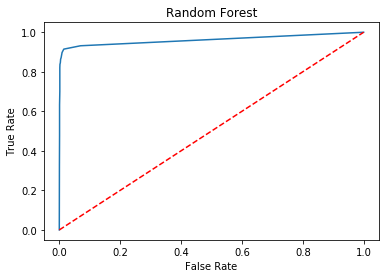

In [76]:
plt.plot(fpr,tpr,label= "RandomForest Classification")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Rate")
plt.ylabel('True Rate')
plt.title("Random Forest")
plt.show()

In [77]:
from sklearn.externals import joblib
joblib.dump(rf,"Space Classification.obj")

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Space Classification.obj']

In [78]:
model = joblib.load("Space Classification.obj")

In [79]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 2])